# **LeNet-5**

In [21]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# **Load Data and split to training and validation**

In [22]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# **Plot some of the mnist data**

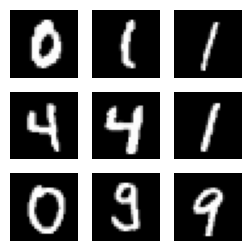

In [23]:
indexes = np.random.randint(0, X_train.shape[0], size=9) # This line gives us random 9 indexes from the images out of 60000 images

images = X_train[indexes] # X has the images
labels = y_train[indexes] # y has the labels to that image

plt.figure(figsize=(3,3))
for i in range(len(indexes)):
  plt.subplot(3, 3, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.axis('off')

plt.show()

# **Preprocess data**

In [24]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [25]:
X_train /= 255
X_valid /= 255

In [26]:
n_classes = 10 # We have numbers from 0 to 9 so we have 10 classes
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

# **Design CNN arcihtecture**

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # we have images that grey and 28x28 pixels

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # we use activation function relu but you can change that to any activation fuction same things for filters and kernel sizes
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # We use dropout to drop the half of the neurons so we can prevent overfitting
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax')) # we use activation function softmax at the end because softmax is much more suitable for multiclass classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

# **Compile The Model**

To compile the model  use compile method.
we chose loss function and optimizer at this points.

In [29]:
# We use SGD and Crossentropy loss but you can change these
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# **Train The model**

In [30]:
# Batch size --> A Batch size of 128 means the model will see 128 picture
#                and adjust the weights before looking the next 128 picture
# Epochs --> How many times our model see the training dataset.
# verbose --> A value of 1 means the training progress will be printed to the console.
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4595 - loss: 1.6457 - val_accuracy: 0.9115 - val_loss: 0.3158
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8534 - loss: 0.4763 - val_accuracy: 0.9328 - val_loss: 0.2299
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8891 - loss: 0.3670 - val_accuracy: 0.9452 - val_loss: 0.1910
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9041 - loss: 0.3263 - val_accuracy: 0.9521 - val_loss: 0.1702
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9105 - loss: 0.2949 - val_accuracy: 0.9556 - val_loss: 0.1631
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9164 - loss: 0.2789 - val_accuracy: 0.9583 - val_loss: 0.1464
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9230 - loss: 0.2575 - val_accuracy: 0.9584 - val_loss: 0.1361
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9254 - loss: 0.2450 - val_accuracy: 

# **Evaluate Model**

In [31]:
preds = model.evaluate(X_valid, y_valid)
print ("Loss = " + str(preds[0]))
print ("Val Accuracy = " + str(preds[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1341
Loss = 0.11645688116550446
Val Accuracy = 0.9660999774932861
